In [ ]:
##Histograms of Interest for relevant branches (More branches to come later)

In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
##Import Signal File

In [7]:
sig_file = uproot.open("user.calpert.mc16_13TeV.311423.MGPy8EG_A14NNPDF23_NNPDF31ME_HSS_LLP_mH600_mS150_lthigh.032123_trees.root/user.calpert.311423.e7357_e5984_s3234_r10201_r10210_p4696.32829947._000001.trees.root:trees_DV_")

In [ ]:
##Concatenate Background files

In [8]:
Branches = [("pass_HLT_j30_muvtx_noiso"), ("hasGoodPV"), ("MSVtx_nMDT"), ("MSVtx_nRPC"),("MSVtx_nTGC"),("MSVtx_eta"),("jet_pT")]

In [ ]:
#The below concatenation takes each specified branch, converts to an array, and then concatenates the array
#Left with an awkward array object, so no need to convert to array as in case with signal.

In [9]:
bkg_file = uproot.concatenate("user.calpert.mc16_13TeV.361022.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ2W.032123_trees.root.479322611/user.calpert*.root:trees_DV_", Branches)

In [ ]:
##Check trigger 

Text(0.5, 1.0, 'Signal Trigger')

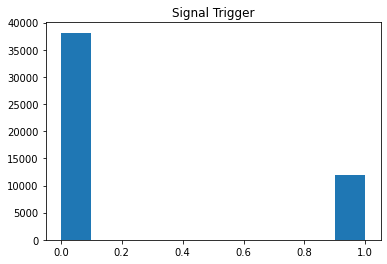

In [37]:
pass_trig=sig_file["pass_HLT_j30_muvtx_noiso"].array()
pass_trig_hist=plt.hist(pass_trig, bins=10)
plt.title("Signal Trigger")


In [ ]:
##Check trigger background

Text(0.5, 1.0, 'Background Trigger')

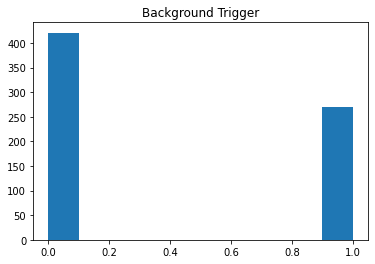

In [11]:
pass_trig=bkg_file["pass_HLT_j30_muvtx_noiso"]
pass_trig_hist=plt.hist(pass_trig, bins=10)
plt.title("Background Trigger")

In [ ]:
##Check for good primary vertex

Text(0.5, 1.0, 'Signal Good PV')

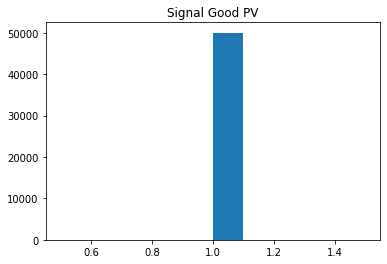

In [15]:
goodPV=sig_file["hasGoodPV"].array()
goodPV_hist=plt.hist(goodPV, bins=10)
plt.title("Signal Good PV")

Text(0.5, 1.0, 'Background Good PV')

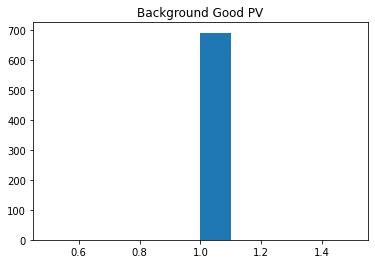

In [16]:
goodPV=bkg_file["hasGoodPV"]
goodPV_hist=plt.hist(goodPV, bins=10)
plt.title("Background Good PV")

In [13]:
##Looks like all candidates have good PV

In [18]:
##Plot histograms for MDT, RPC, TGC hits

Text(0.5, 1.0, 'Signal MDT Hits')

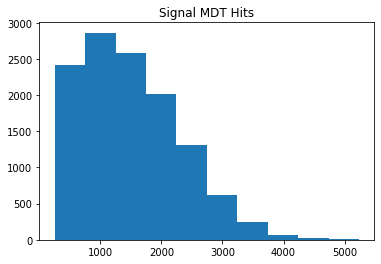

In [17]:
MDT_hits=ak.flatten(sig_file["MSVtx_nMDT"].array())
FilterMDT_hits=MDT_hits[MDT_hits>0]
MDT_hits_hist=plt.hist(FilterMDT_hits, bins=10)
plt.title("Signal MDT Hits")

Text(0.5, 1.0, 'Background MDT Hits')

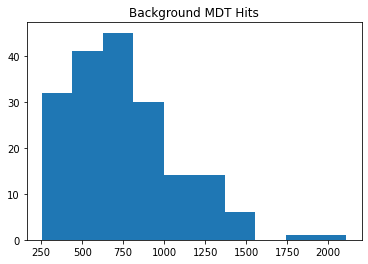

In [18]:
MDT_hits=ak.flatten(bkg_file["MSVtx_nMDT"])
FilterMDT_hits=MDT_hits[MDT_hits>0]
MDT_hits_hist=plt.hist(FilterMDT_hits, bins=10)
plt.title("Background MDT Hits")

Text(0.5, 1.0, 'Signal RPC Hits')

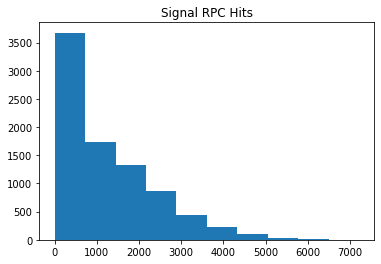

In [19]:
RPC_hits=ak.flatten(sig_file["MSVtx_nRPC"].array())
FilterRPC_hits=RPC_hits[RPC_hits>0]
RPC_hits_hist=plt.hist(FilterRPC_hits, bins=10)
plt.title("Signal RPC Hits")

Text(0.5, 1.0, 'Background RPC Hits')

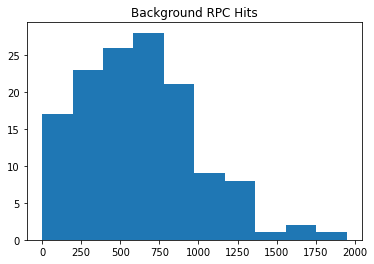

In [20]:
RPC_hits=ak.flatten(bkg_file["MSVtx_nRPC"])
FilterRPC_hits=RPC_hits[RPC_hits>0]
RPC_hits_hist=plt.hist(FilterRPC_hits, bins=10)
plt.title("Background RPC Hits")

Text(0.5, 1.0, 'Signal TGC Hits')

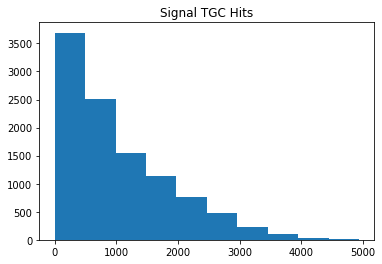

In [21]:
TGC_hits=ak.flatten(sig_file["MSVtx_nTGC"].array())
FilterTGC_hits=TGC_hits[TGC_hits>0]
TGC_hits_hist=plt.hist(FilterTGC_hits, bins=10)
plt.title("Signal TGC Hits")

Text(0.5, 1.0, 'Background TGC Hits')

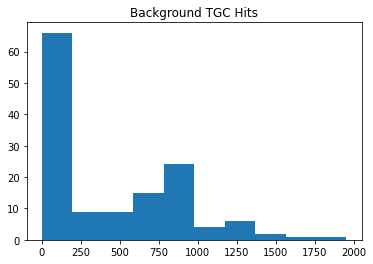

In [22]:
TGC_hits=ak.flatten(bkg_file["MSVtx_nTGC"])
FilterTGC_hits=TGC_hits[TGC_hits>0]
TGC_hits_hist=plt.hist(FilterTGC_hits, bins=10)
plt.title("Background TGC Hits")

In [24]:
#Filter out eta for barrel/endcap overlap

In [24]:
eta=ak.flatten(sig_file["MSVtx_eta"].array()) #Have a look at the eta branch

Text(0.5, 1.0, 'Signal (Raw eta values)')

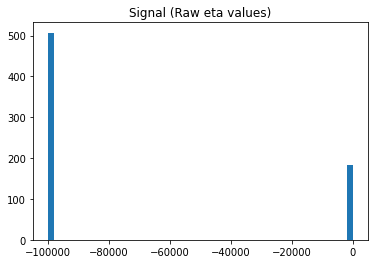

In [38]:
#Inspect array....filter out extreme values, get a sense of real values of eta
eta_hist=plt.hist(eta, bins=50)
plt.title("Signal (Raw eta values)")

In [27]:
eta_filter=eta[eta>-3]

Text(0.5, 1.0, 'Signal Good Eta Values')

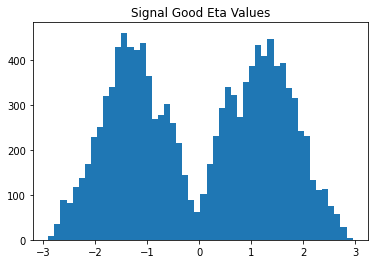

In [28]:
eta_filter_hist = plt.hist(eta_filter, bins = 50) #Take a look at our real values of eta
plt.title("Signal Good Eta Values")

In [27]:
#Now filter out veto region 

Text(0.5, 1.0, 'Signal Eta Filtered Region')

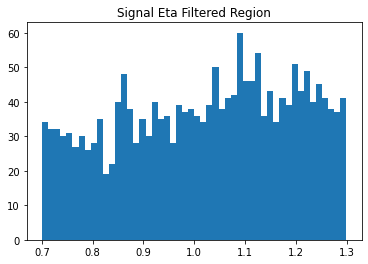

In [30]:
eta_veto = eta_filter[(eta_filter>0.7) * (eta_filter<1.3)]
plt.hist(eta_veto, bins=50)
plt.title("Signal Eta Filtered Region")

In [31]:
eta=ak.flatten(bkg_file["MSVtx_eta"])

Text(0.5, 1.0, 'Background Eta Filtered Region')

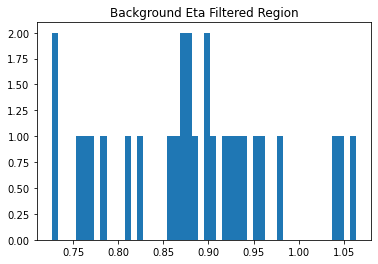

In [32]:
eta_filter=eta[eta>-3]
eta_veto = eta_filter[(eta_filter > 0.7) & (eta_filter < 1.3)]
eta_veto_hist = plt.hist(eta_veto, bins = 50)
plt.title("Background Eta Filtered Region")

In [28]:
##Check out Jet pT

Text(0.5, 1.0, 'Signal Jet pT')

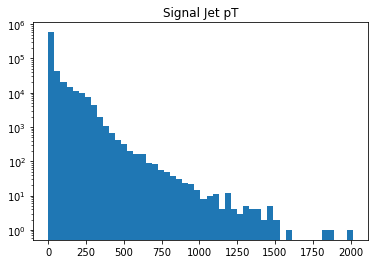

In [33]:
jet_pt=ak.flatten(sig_file["jet_pT"].array())
plt.hist(jet_pt, bins=50, log=True)
plt.title("Signal Jet pT")

Text(0.5, 1.0, 'Background Jet_pT')

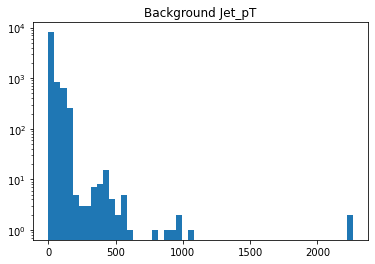

In [34]:
##Check out Jet pT
jet_pt=ak.flatten(bkg_file["jet_pT"])
plt.hist(jet_pt, bins=50, log=True)
plt.title("Background Jet_pT")